<a href="https://colab.research.google.com/github/aekanun2020/Data-Analytics-using-Python/blob/main/Solution_Homework_Python_Pandas_CoeffVariation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
! wget https://storage.googleapis.com/5-7sep2022/data/2008.csv

--2022-09-16 06:04:51--  https://storage.googleapis.com/5-7sep2022/data/2008.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689413344 (657M) [text/csv]
Saving to: ‘2008.csv’

2008.csv            100%[===================>] 657.48M   208MB/s    in 3.2s    

2022-09-16 06:04:54 (204 MB/s) - ‘2008.csv’ saved [689413344/689413344]



In [4]:
! wc -l 2008.csv

7009729 2008.csv


In [5]:
f = "2008.csv"
num_lines = sum(1 for l in open(f))
size = int(num_lines / 100)
import random
skip_idx = random.sample(range(1, num_lines), num_lines - size)
raw_pd = pd.read_csv(f, skiprows=skip_idx)

In [6]:
#raw_pd = pd.read_csv("2008.csv")

In [7]:
raw_pd.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1849.0,1740,121.0,30,WN,564,...,2.0,15.0,0,NaN,0,10.0,0.0,0.0,0.0,41.0
1,2008,1,3,4,1210.0,1200,1905.0,1850,WN,991,...,6.0,28.0,0,NaN,0,10.0,0.0,5.0,0.0,0.0
2,2008,1,3,4,1439.0,1425,1720.0,1720,WN,1582,...,7.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,612.0,615,713.0,715,WN,2712,...,3.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1125.0,1010,1224.0,1110,WN,1016,...,5.0,9.0,0,NaN,0,9.0,0.0,0.0,0.0,65.0


In [8]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70096 entries, 0 to 70095
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70096 non-null  int64  
 1   Month              70096 non-null  int64  
 2   DayofMonth         70096 non-null  int64  
 3   DayOfWeek          70096 non-null  int64  
 4   DepTime            68741 non-null  float64
 5   CRSDepTime         70096 non-null  int64  
 6   ArrTime            68589 non-null  float64
 7   CRSArrTime         70096 non-null  int64  
 8   UniqueCarrier      70096 non-null  object 
 9   FlightNum          70096 non-null  int64  
 10  TailNum            69273 non-null  object 
 11  ActualElapsedTime  68554 non-null  float64
 12  CRSElapsedTime     70087 non-null  float64
 13  AirTime            68554 non-null  float64
 14  ArrDelay           68554 non-null  float64
 15  DepDelay           68741 non-null  float64
 16  Origin             700

In [9]:
raw_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,70096.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,70096.0,6.356611,3.417116,1.0,3.0,6.0,9.0,12.0
DayofMonth,70096.0,15.732724,8.818480,1.0,8.0,16.0,23.0,31.0
DayOfWeek,70096.0,3.922207,1.987466,1.0,2.0,4.0,6.0,7.0
DepTime,68741.0,1334.143161,479.833671,1.0,925.0,1326.0,1729.0,2400.0
CRSDepTime,70096.0,1326.132361,465.997063,1.0,925.0,1320.0,1716.0,2359.0
ArrTime,68589.0,1480.717579,506.360478,1.0,1105.0,1513.0,1909.0,2400.0
CRSArrTime,70096.0,1492.982367,484.609071,1.0,1112.0,1517.0,1905.0,2400.0
FlightNum,70096.0,2204.825639,1950.016510,1.0,619.0,1556.0,3466.0,7829.0
ActualElapsedTime,68554.0,127.434402,70.109548,18.0,77.0,110.0,157.0,905.0


In [10]:
describe_pd = pd.DataFrame(raw_pd.describe().transpose())

In [11]:
describe_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Year to LateAircraftDelay
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   24 non-null     float64
 1   mean    24 non-null     float64
 2   std     24 non-null     float64
 3   min     24 non-null     float64
 4   25%     24 non-null     float64
 5   50%     24 non-null     float64
 6   75%     24 non-null     float64
 7   max     24 non-null     float64
dtypes: float64(8)
memory usage: 2.2+ KB


In [12]:
#describe_pd['std'].apply(lambda x: x/100)
describe_pd.assign(cv=lambda x: ((100/x['mean'])*x['std']))[['mean','std','cv']]
#df.assign(Discount_Percent=lambda x: (100/x.Fee)*x.Discount)

,mean,std,cv
Year,2008.000000,0.000000,0.000000
Month,6.356611,3.417116,53.756878
DayofMonth,15.732724,8.818480,56.051836
DayOfWeek,3.922207,1.987466,50.672144
DepTime,1334.143161,479.833671,35.965681
CRSDepTime,1326.132361,465.997063,35.139559
ArrTime,1480.717579,506.360478,34.196965
CRSArrTime,1492.982367,484.609071,32.459129
FlightNum,2204.825639,1950.016510,88.443117
ActualElapsedTime,127.434402,70.109548,55.016186


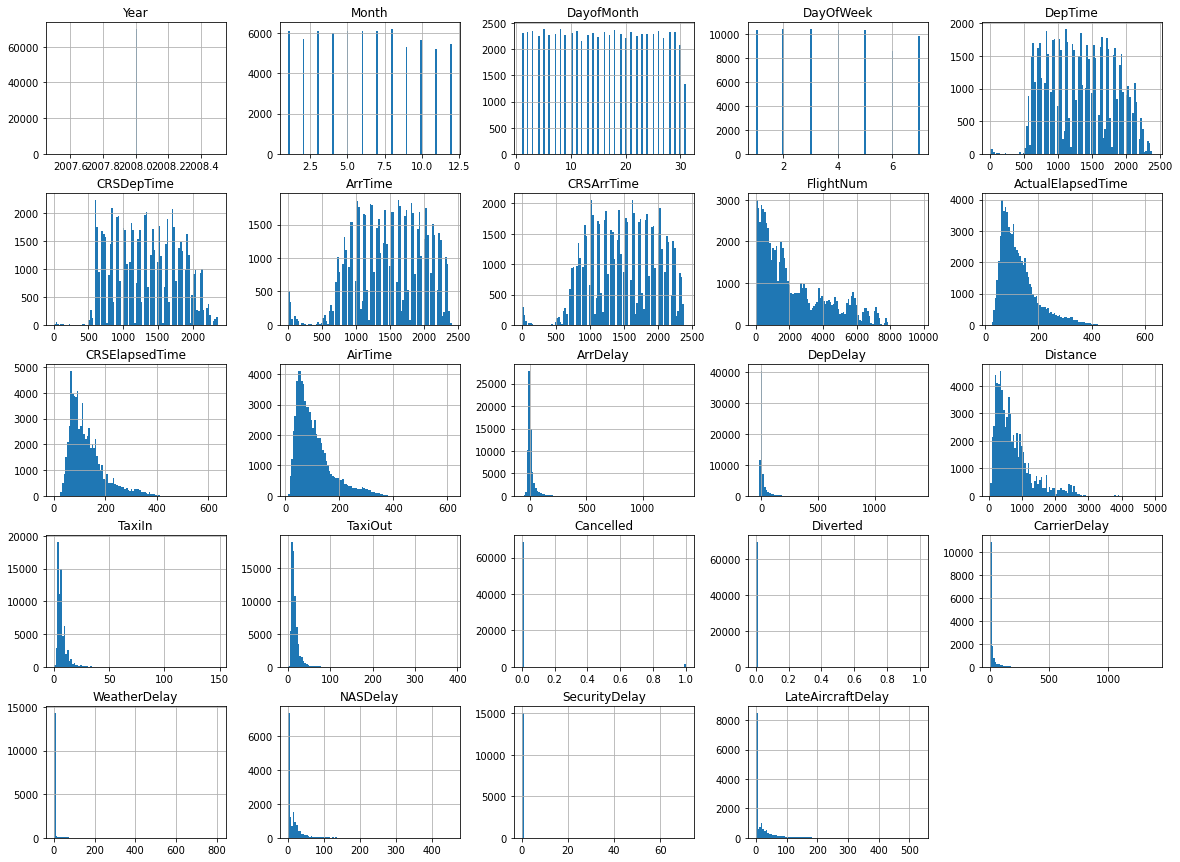

In [ ]:
raw_pd.hist(bins=100, figsize=(20,15))
plt.show()

In [ ]:
categorical = list(raw_pd.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(raw_pd.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['DepTime', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
Numerical columns are: ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


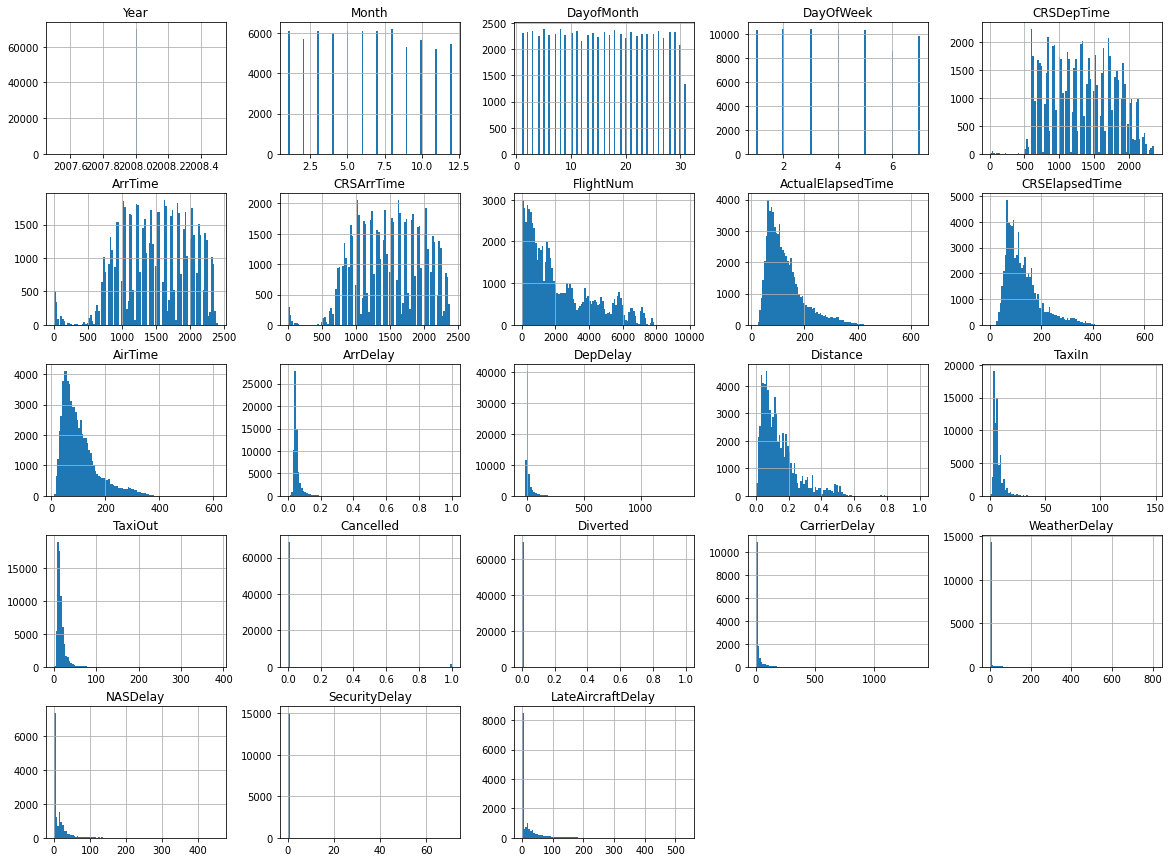

In [ ]:
raw_pd[numerical].hist(bins=100, figsize=(20,15))
plt.show()

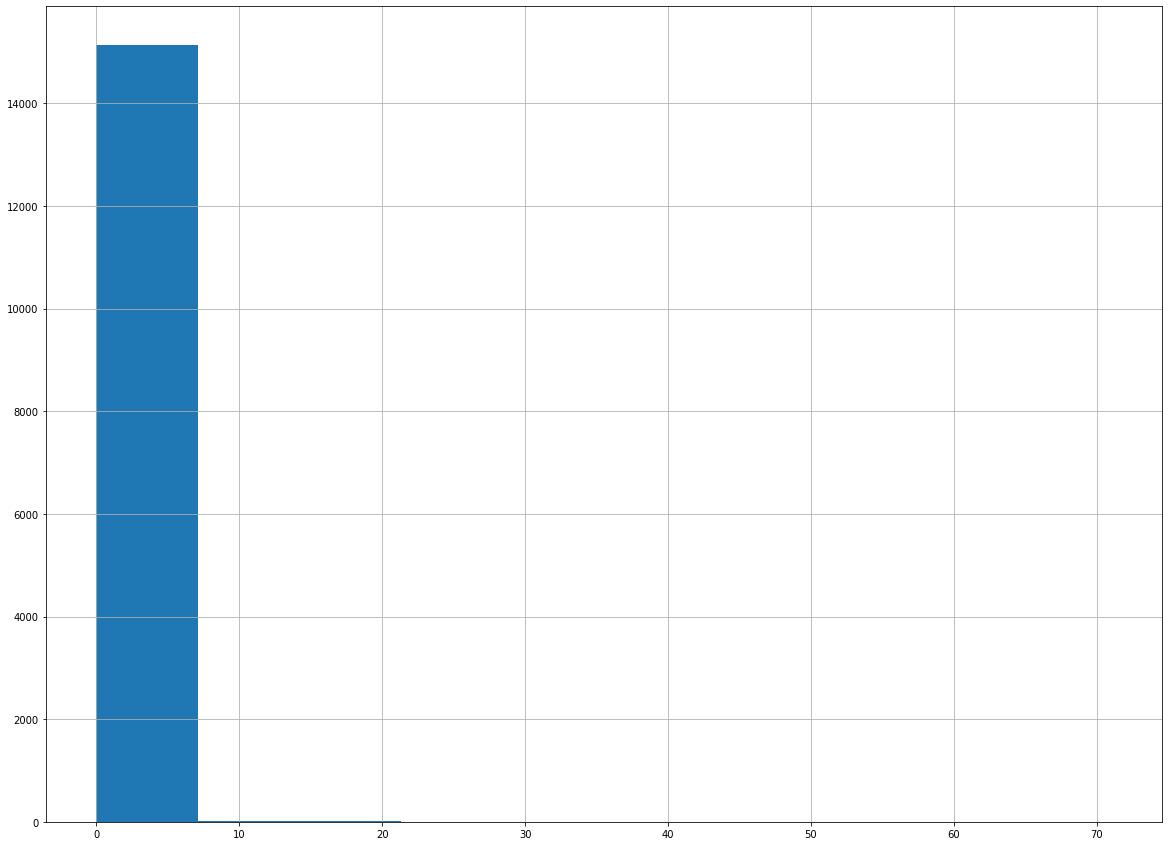

In [ ]:
raw_pd['SecurityDelay'].hist(bins=10, figsize=(20,15))
plt.show()

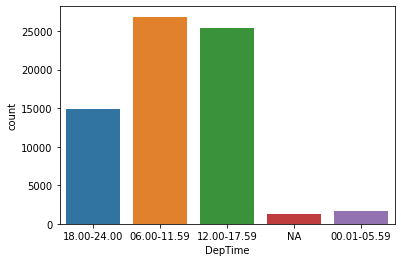

In [ ]:
sns.countplot(raw_pd['DepTime']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


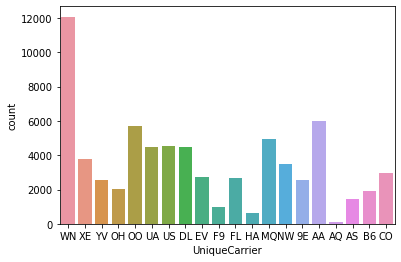

In [ ]:
sns.countplot(raw_pd['UniqueCarrier']);

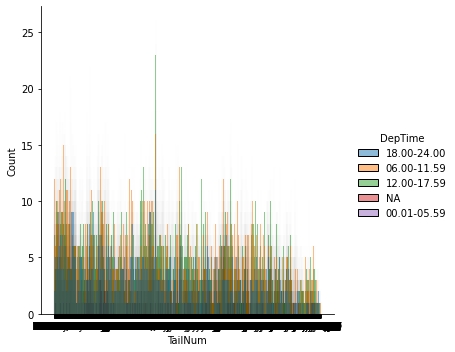

In [ ]:
sns.displot(raw_pd,x='TailNum', hue='DepTime');

In [ ]:
raw_pd['AirTime'].describe()

count    68631.000000
mean       104.097682
std         67.488091
min          9.000000
25%         55.000000
50%         86.000000
75%        132.000000
max        615.000000
Name: AirTime, dtype: float64

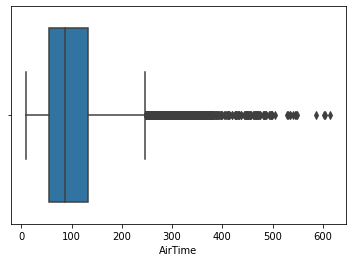

In [ ]:
sns.boxplot(x=raw_pd['AirTime'])

In [ ]:
raw_pd['ActualElapsedTime'].describe()

count    68631.000000
mean       127.342790
std         70.230243
min         18.000000
25%         76.000000
50%        109.000000
75%        157.000000
max        632.000000
Name: ActualElapsedTime, dtype: float64

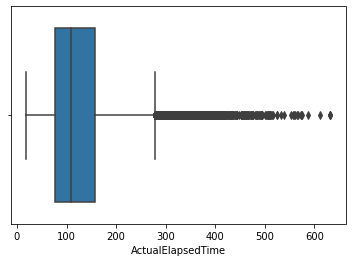

In [ ]:
sns.boxplot(x=raw_pd['ActualElapsedTime'])

In [ ]:
raw_pd['Cancelled'].describe()

count    70096.000000
mean         0.018632
std          0.135221
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Cancelled, dtype: float64

In [ ]:
raw_pd.groupby(by='Cancelled')['Cancelled'].count()

Cancelled
0    68790
1     1306
Name: Cancelled, dtype: int64

In [ ]:
raw_pd['Diverted'].describe()

count    70096.000000
mean         0.002268
std          0.047573
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Diverted, dtype: float64

In [ ]:
raw_pd.groupby(by='Diverted')['Diverted'].count()

Diverted
0    69937
1      159
Name: Diverted, dtype: int64

In [ ]:
analysisCol_list = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']

In [ ]:
raw_pd[analysisCol_list[0]].describe()

count    15186.000000
mean        15.965758
std         42.100466
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max       1382.000000
Name: CarrierDelay, dtype: float64

In [ ]:
#sns.scatterplot(data=raw_pd, x=analysisCol_list[1],y=analysisCol_list[1])

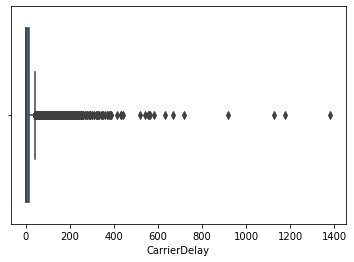

In [ ]:
sns.boxplot(x=raw_pd[analysisCol_list[0]])

In [ ]:
raw_pd[analysisCol_list[1]].describe()

count    15186.000000
mean         3.212828
std         21.066679
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        803.000000
Name: WeatherDelay, dtype: float64

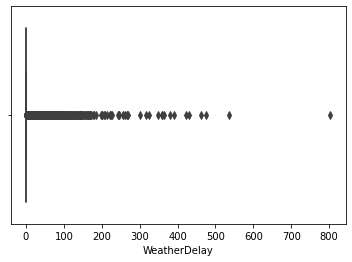

In [ ]:
sns.boxplot(x=raw_pd[analysisCol_list[1]])

In [ ]:
raw_pd[analysisCol_list[2]].describe()

count    15186.000000
mean        16.838535
std         32.150011
min          0.000000
25%          0.000000
50%          5.000000
75%         21.000000
max        454.000000
Name: NASDelay, dtype: float64

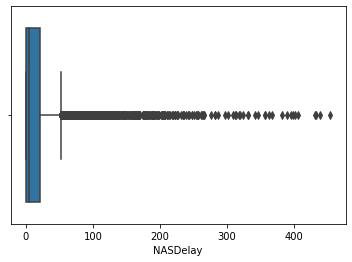

In [ ]:
sns.boxplot(x=raw_pd[analysisCol_list[2]])

In [ ]:
raw_pd[analysisCol_list[3]].describe()

count    15186.000000
mean         0.075464
std          1.432662
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         71.000000
Name: SecurityDelay, dtype: float64

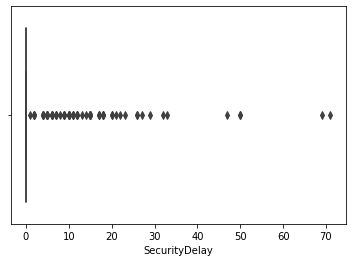

In [ ]:
sns.boxplot(x=raw_pd[analysisCol_list[3]])

In [ ]:
raw_pd[analysisCol_list[4]].describe()

count    15186.000000
mean        20.990847
std         38.434664
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max        533.000000
Name: LateAircraftDelay, dtype: float64

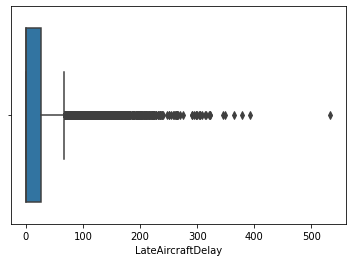

In [ ]:
sns.boxplot(x=raw_pd[analysisCol_list[4]])

In [ ]:
raw_pd['ArrDelay'].describe()

count    68631.000000
mean         8.116857
std         38.908141
min        -72.000000
25%        -10.000000
50%         -2.000000
75%         12.000000
max       1382.000000
Name: ArrDelay, dtype: float64

In [ ]:
#sns.scatterplot(data=raw_pd, x='ArrDelay',y='ArrDelay')

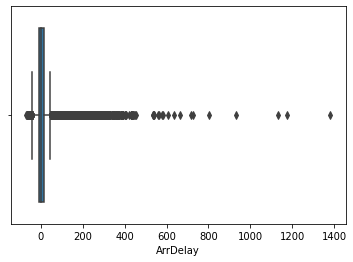

In [ ]:
sns.boxplot(x=raw_pd['ArrDelay'])

In [ ]:
raw_pd['DepDelay'].describe()

count    68804.000000
mean        10.006729
std         35.893770
min        -49.000000
25%         -4.000000
50%         -1.000000
75%          8.000000
max       1395.000000
Name: DepDelay, dtype: float64

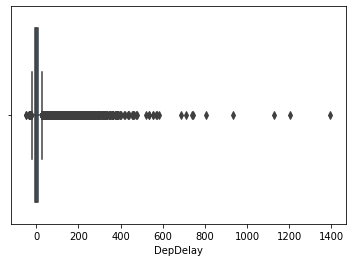

In [ ]:
sns.boxplot(x=raw_pd['DepDelay'])

In [ ]:
raw_pd['TaxiIn'].describe()

count    68660.000000
mean         6.871599
std          4.939757
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max        148.000000
Name: TaxiIn, dtype: float64

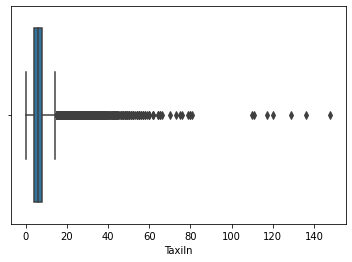

In [ ]:
sns.boxplot(x=raw_pd['TaxiIn'])

In [ ]:
raw_pd['TaxiOut'].describe()

count    68793.000000
mean        16.383135
std         11.289526
min          0.000000
25%         10.000000
50%         14.000000
75%         19.000000
max        386.000000
Name: TaxiOut, dtype: float64

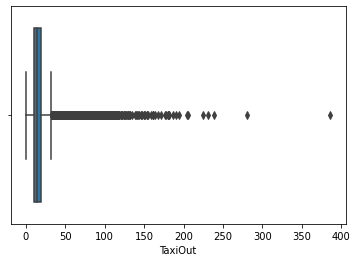

In [ ]:
sns.boxplot(x=raw_pd['TaxiOut'])

In [ ]:
raw_pd['Distance'].describe()

count    70096.000000
mean       727.084855
std        563.692546
min         30.000000
25%        324.000000
50%        581.000000
75%        954.000000
max       4962.000000
Name: Distance, dtype: float64

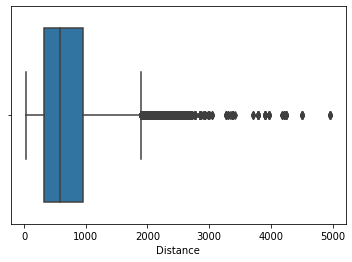

In [ ]:
sns.boxplot(x=raw_pd['Distance'])

In [ ]:
raw_pd['AirTime'].describe()

count    68631.000000
mean       104.097682
std         67.488091
min          9.000000
25%         55.000000
50%         86.000000
75%        132.000000
max        615.000000
Name: AirTime, dtype: float64

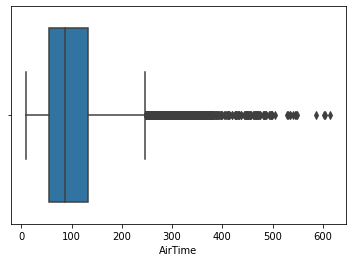

In [ ]:
sns.boxplot(x=raw_pd['AirTime'])

In [ ]:
def t_timeperiod(origin):
    if origin is None:
        period = None
    elif origin > 0 and origin < 600:
        period = '00.01-05.59'
    elif origin >= 600 and origin <=1200:
        period = '06.00-11.59'
    elif origin >= 1200 and origin <= 1800:
        period = '12.00-17.59'
    elif origin >= 1800 and origin <= 2400:
        period = '18.00-24.00'
    else:
        period = 'NA'
    return period

In [ ]:
raw_pd['DepTime'] = raw_pd['DepTime'].apply(lambda x:t_timeperiod(x))

In [ ]:
max_distance = raw_pd['Distance'].max()
min_distance = raw_pd['Distance'].min()

In [ ]:
max_ArrDelay = raw_pd['ArrDelay'].max()
min_ArrDelay = raw_pd['ArrDelay'].min()

In [ ]:
def t_normalized_distance(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_distance)/(max_distance-min_distance))

In [ ]:
def t_normalized_ArrDelay(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_ArrDelay)/(max_ArrDelay-min_ArrDelay))

In [ ]:
raw_pd['Distance'] = raw_pd['Distance'].apply(lambda x:t_normalized_distance(x))

In [ ]:
raw_pd['ArrDelay'] = raw_pd['ArrDelay'].apply(lambda x:t_normalized_ArrDelay(x))

In [ ]:
features_pd = raw_pd[['UniqueCarrier','Origin','Dest',\
        'DepTime','TaxiOut','TaxiIn','DepDelay',\
        'DayOfWeek','Distance','ArrDelay']]

In [ ]:
final_pd = features_pd.dropna()

In [ ]:
final_pd.count()

UniqueCarrier    68631
Origin           68631
Dest             68631
DepTime          68631
TaxiOut          68631
TaxiIn           68631
DepDelay         68631
DayOfWeek        68631
Distance         68631
ArrDelay         68631
dtype: int64

In [ ]:
features_pd.head(20)

,UniqueCarrier,Origin,Dest,DepTime,TaxiOut,TaxiIn,DepDelay,DayOfWeek,Distance,ArrDelay
0,WN,LAS,PHX,18.00-24.00,9.0,5.0,46.0,4,0.045823,0.079092
1,WN,LAX,HOU,18.00-24.00,7.0,3.0,45.0,4,0.275750,0.072902
2,WN,MCO,FLL,18.00-24.00,12.0,4.0,8.0,4,0.030008,0.051582
3,WN,MDW,CMH,06.00-11.59,8.0,5.0,1.0,4,0.051500,0.046768
4,WN,MDW,HOU,06.00-11.59,9.0,3.0,34.0,4,0.183901,0.060523
5,WN,MSY,HOU,12.00-17.59,5.0,6.0,1.0,4,0.055353,0.048831
6,WN,OAK,LAS,12.00-17.59,23.0,20.0,17.0,4,0.076440,0.072902
7,WN,PHX,RNO,18.00-24.00,12.0,4.0,83.0,4,0.115775,0.101100
8,WN,PHX,SLC,06.00-11.59,11.0,6.0,37.0,4,0.096715,0.068088
9,WN,PHX,SNA,12.00-17.59,10.0,4.0,9.0,4,0.062449,0.056396


In [ ]:


#raw_pd.isnull().sum()
#nullCol_series = raw_pd.isnull().sum()
#notNull_list = list(nullCol_series[nullCol_series == 0].index)
#notNull_list
#requiredCol_list = ['TaxiIn','TaxiOut','ArrDelay']
#selectedCol_list = notNull_list + requiredCol_list
#noNull_pd = raw_pd.loc[:,selectedCol_list].dropna()
#noNull_pd.isnull().sum()
#noNull_pd.describe()
#noNull_pd.info()

In [ ]:
#final_pd = noNull_pd

In [ ]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [ ]:
train_df = final_pd.sample(frac=0.8,random_state=123)

In [ ]:
test_df = final_pd.drop(train_df.index)

In [ ]:
train_df.count()

UniqueCarrier    54905
Origin           54905
Dest             54905
DepTime          54905
TaxiOut          54905
TaxiIn           54905
DepDelay         54905
DayOfWeek        54905
Distance         54905
ArrDelay         54905
dtype: int64

In [ ]:
test_df.count()

UniqueCarrier    13726
Origin           13726
Dest             13726
DepTime          13726
TaxiOut          13726
TaxiIn           13726
DepDelay         13726
DayOfWeek        13726
Distance         13726
ArrDelay         13726
dtype: int64

In [ ]:
train_labels = train_df.filter(['ArrDelay'])
train_df = train_df.loc[:, train_df.columns != 'ArrDelay']

In [ ]:
type(train_labels)

pandas.core.frame.DataFrame

In [ ]:
test_labels = test_df.filter(['ArrDelay'])
test_df = test_df.loc[:, test_df.columns != 'ArrDelay']

In [ ]:
X_train = train_df
X_test = test_df
y_train = train_labels
y_test = test_labels

In [ ]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'Origin', 'Dest', 'DepTime']
Numerical columns are: ['TaxiOut', 'TaxiIn', 'DepDelay', 'DayOfWeek', 'Distance']


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]

# Define categorical pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical))
                     #('imputer', SimpleImputer(strategy='median')),
                     #('scaler', MinMaxScaler())
                    ])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])

# Model Training
pipe = Pipeline(steps=[('preprocessor', preprocessor),
              ('model', DecisionTreeRegressor(max_depth=None))])
pipeline_model = pipe.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = pipeline_model.predict(X_test)
print("\t RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("\t R2 score:", r2_score(y_test, predictions))

	 RMSE: 0.010223548107229233
	 R2 score: 0.8679961803745987
